Import necessary libraries

In [ ]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.0 MB/s eta 0:00:00


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

Define the structure of the Bayesian Network

Creating the model by specifying the nodes and the edges between them

In [ ]:
model = BayesianNetwork([('Burglary', 'Alarm'),
                         ('Earthquake', 'Alarm'),
                         ('Alarm', 'JohnCalls'),
                         ('Alarm', 'MaryCalls')])

Define the Conditional Probability Distributions (CPDs)

CPD for Burglary: P(Burglary) = [0.001, 0.999]

In [ ]:
cpd_burglary = TabularCPD(variable='Burglary', variable_card=2, values=[[0.001], [0.999]])

CPD for Earthquake: P(Earthquake) = [0.002, 0.998]

In [ ]:
cpd_earthquake = TabularCPD(variable='Earthquake', variable_card=2, values=[[0.002], [0.998]])

CPD for Alarm given Burglary and Earthquake

P(Alarm | Burglary, Earthquake)

In [ ]:
cpd_alarm = TabularCPD(variable='Alarm', variable_card=2,
                       values=[[0.95, 0.94, 0.29, 0.001],  # Alarm = 1
                               [0.05, 0.06, 0.71, 0.999]],  # Alarm = 0
                       evidence=['Burglary', 'Earthquake'],
                       evidence_card=[2, 2])

CPD for JohnCalls given Alarm

P(JohnCalls | Alarm)

In [ ]:
cpd_john = TabularCPD(variable='JohnCalls', variable_card=2,
                      values=[[0.90, 0.05],  # JohnCalls = 1
                              [0.10, 0.95]],  # JohnCalls = 0
                      evidence=['Alarm'], evidence_card=[2])

CPD for MaryCalls given Alarm

P(MaryCalls | Alarm)

In [ ]:
cpd_mary = TabularCPD(variable='MaryCalls', variable_card=2,
                      values=[[0.70, 0.01],  # MaryCalls = 1
                              [0.30, 0.99]],  # MaryCalls = 0
                      evidence=['Alarm'], evidence_card=[2])

Add CPDs to the model

In [ ]:
model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_john, cpd_mary)

Check if the model is valid

In [ ]:
assert model.check_model(), "Model is not valid"

Perform inference using Variable Elimination

In [ ]:
inference = VariableElimination(model)

Query probabilities

Example query1: P(Alarm | Burglary=1, Earthquake=0)

In [ ]:
result = inference.query(variables=['Alarm'], evidence={'Burglary': 1, 'Earthquake': 0})
print("\nP(Alarm | Burglary=1, Earthquake=0):")
print(result)


P(Alarm | Burglary=1, Earthquake=0):
+----------+--------------+
| Alarm    |   phi(Alarm) |
+==========+==============+
| Alarm(0) |       0.2900 |
+----------+--------------+
| Alarm(1) |       0.7100 |
+----------+--------------+


Example query2: P(JohnCalls | Alarm=1)

In [ ]:
result_john_calls = inference.query(variables=['JohnCalls'], evidence={'Alarm': 1})
print("\nP(JohnCalls | Alarm=1):")
print(result_john_calls)


P(JohnCalls | Alarm=1):
+--------------+------------------+
| JohnCalls    |   phi(JohnCalls) |
+==============+==================+
| JohnCalls(0) |           0.0500 |
+--------------+------------------+
| JohnCalls(1) |           0.9500 |
+--------------+------------------+


Example query3:P(MaryCalls | Alarm=1)

In [ ]:
result_mary_calls = inference.query(variables=['MaryCalls'], evidence={'Alarm': 1})
print("\nP(MaryCalls | Alarm=1):")
print(result_mary_calls)


P(MaryCalls | Alarm=1):
+--------------+------------------+
| MaryCalls    |   phi(MaryCalls) |
+==============+==================+
| MaryCalls(0) |           0.0100 |
+--------------+------------------+
| MaryCalls(1) |           0.9900 |
+--------------+------------------+


Example query4: Joint Probability of all variables: P(Burglary, Earthquake, Alarm, JohnCalls, MaryCalls)

In [ ]:
joint_prob = inference.query(variables=['Burglary', 'Earthquake', 'Alarm', 'JohnCalls', 'MaryCalls'])
print("\nJoint Probability of all variables:")
print(joint_prob)


Joint Probability of all variables:
+-------------+---------------+----------+--------------+--------------+------------------------------------------------------+
| Burglary    | Earthquake    | Alarm    | JohnCalls    | MaryCalls    |   phi(Burglary,Earthquake,Alarm,JohnCalls,MaryCalls) |
+=============+===============+==========+==============+==============+======================================================+
| Burglary(0) | Earthquake(0) | Alarm(0) | JohnCalls(0) | MaryCalls(0) |                                               0.0000 |
+-------------+---------------+----------+--------------+--------------+------------------------------------------------------+
| Burglary(0) | Earthquake(0) | Alarm(0) | JohnCalls(0) | MaryCalls(1) |                                               0.0000 |
+-------------+---------------+----------+--------------+--------------+------------------------------------------------------+
| Burglary(0) | Earthquake(0) | Alarm(0) | JohnCalls(1) | MaryCalls

Visualizing the Bayesian Network

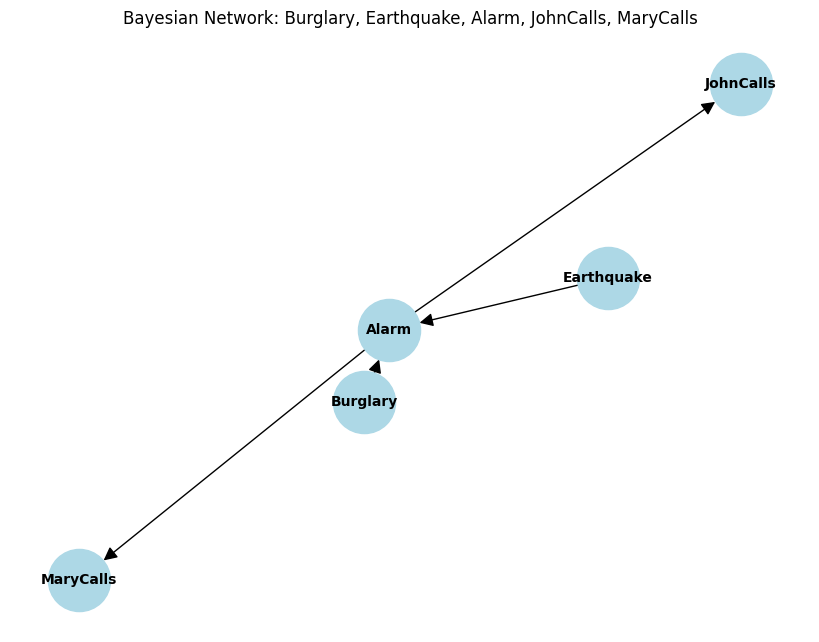

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert Bayesian Network to a networkx DiGraph
graph = nx.DiGraph()

# Add nodes and edges from Bayesian Network 'model'
graph.add_nodes_from(model.nodes())
graph.add_edges_from(model.edges())

# Step 2: Visualize the directed Bayesian Network
plt.figure(figsize=(8, 6))
nx.draw(graph, with_labels=True, node_size=2000, node_color="lightblue",
        font_size=10, font_weight="bold", arrowsize=20)

plt.title("Bayesian Network: Burglary, Earthquake, Alarm, JohnCalls, MaryCalls")
plt.show()